In [2]:
# 加载所需的库和数据
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

def load_data(file_name):
    df = pd.read_csv("D:/Innovation/DataSet/" + file_name ,encoding='gbk')
    columns = df.columns
    df.fillna(df.mean(numeric_only=True) ,inplace=True)
    return df

In [4]:
df = load_data('my_hot.csv')
df

,交易额,交易时间,气温,气象站大气压,海平面大气压,相对湿度,平均风速,商户名称_B02公寓浴池,商户名称_B07公寓浴池,商户名称_一区饺子园主食一组,...,星期_7,是否为工作日_0,是否为工作日_1,时段_0,时段_1,时段_2,时段_3,时段_4,天气好/坏_0,天气好/坏_1
0,8.90,2023/4/25 18:02,7,742.7,755.4,66,10,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,11.84,2023/4/25 17:35,7,742.7,755.4,66,10,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,13.00,2023/4/25 11:46,7,742.7,755.4,66,10,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,2.65,2023/4/25 7:49,7,742.7,755.4,66,10,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,18.40,2023/4/24 17:57,14,754.0,766.6,14,7,0,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,14.00,2022/1/1 11:22,-17,753.2,767.3,60,4,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1392,0.19,2022/1/1 2:04,-17,753.2,767.3,60,4,1,0,0,...,0,1,0,0,0,0,0,1,1,0
1393,0.17,2022/1/1 2:04,-17,753.2,767.3,60,4,1,0,0,...,0,1,0,0,0,0,0,1,1,0
1394,0.09,2022/1/1 2:03,-17,753.2,767.3,60,4,1,0,0,...,0,1,0,0,0,0,0,1,1,0


In [7]:
import time
df['timestamp'] = df['交易时间'].apply(lambda x:time.mktime(time.strptime(x,'%Y/%m/%d %H:%M')))
df

,交易额,交易时间,气温,气象站大气压,海平面大气压,相对湿度,平均风速,商户名称_B02公寓浴池,商户名称_B07公寓浴池,商户名称_一区饺子园主食一组,...,是否为工作日_0,是否为工作日_1,时段_0,时段_1,时段_2,时段_3,时段_4,天气好/坏_0,天气好/坏_1,timestamp
0,8.90,2023/4/25 18:02,7,742.7,755.4,66,10,0,0,0,...,0,1,0,0,0,1,0,1,0,1.682417e+09
1,11.84,2023/4/25 17:35,7,742.7,755.4,66,10,0,0,0,...,0,1,0,0,0,1,0,1,0,1.682415e+09
2,13.00,2023/4/25 11:46,7,742.7,755.4,66,10,0,0,0,...,0,1,0,1,0,0,0,1,0,1.682394e+09
3,2.65,2023/4/25 7:49,7,742.7,755.4,66,10,0,0,0,...,0,1,1,0,0,0,0,1,0,1.682380e+09
4,18.40,2023/4/24 17:57,14,754.0,766.6,14,7,0,0,0,...,0,1,0,0,0,1,0,1,0,1.682330e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,14.00,2022/1/1 11:22,-17,753.2,767.3,60,4,0,0,0,...,1,0,0,1,0,0,0,1,0,1.641007e+09
1392,0.19,2022/1/1 2:04,-17,753.2,767.3,60,4,1,0,0,...,1,0,0,0,0,0,1,1,0,1.640974e+09
1393,0.17,2022/1/1 2:04,-17,753.2,767.3,60,4,1,0,0,...,1,0,0,0,0,0,1,1,0,1.640974e+09
1394,0.09,2022/1/1 2:03,-17,753.2,767.3,60,4,1,0,0,...,1,0,0,0,0,0,1,1,0,1.640974e+09


In [39]:
timestamp = df['timestamp'] #时间戳
timestamp

0       1.682417e+09
1       1.682415e+09
2       1.682394e+09
3       1.682380e+09
4       1.682330e+09
            ...     
1391    1.641007e+09
1392    1.640974e+09
1393    1.640974e+09
1394    1.640974e+09
1395    1.640974e+09
Name: timestamp, Length: 1396, dtype: float64

In [38]:
address = df.iloc[:,7:89]
address

,商户名称_B02公寓浴池,商户名称_B07公寓浴池,商户名称_一区饺子园主食一组,商户名称_一区饺子园凉菜组,商户名称_中央红小月亮B02,商户名称_中央红小月亮门店5,商户名称_南苑特色铁板烧,商户名称_友来副食一组,商户名称_友来小猪憨尼麻辣烫,商户名称_友来朝鲜风味,...,商户名称_锦绣食堂水吧,商户名称_锦绣食堂湘汁拌饭,商户名称_锦绣食堂王记手工土豆粉,商户名称_锦绣食堂这家有面,商户名称_阳光副食二组,商户名称_阳光小是小简餐,商户名称_阳光川蜀源烤鱼,商户名称_阳光广式猪脚饭,商户名称_骄子园主食一组,商户名称_骄子园主食二组
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1392,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1393,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1394,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
week = df.iloc[:, 89:96]
week

,星期_1,星期_2,星期_3,星期_4,星期_5,星期_6,星期_7
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1391,0,0,0,0,0,1,0
1392,0,0,0,0,0,1,0
1393,0,0,0,0,0,1,0
1394,0,0,0,0,0,1,0


In [34]:
is_workday = df.iloc[:, 96:98]
is_workday

,是否为工作日_0,是否为工作日_1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1391,1,0
1392,1,0
1393,1,0
1394,1,0


In [28]:
period = df.iloc[:, 98:103]
period

,时段_0,时段_1,时段_2,时段_3,时段_4
0,0,0,0,1,0
1,0,0,0,1,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
1391,0,1,0,0,0
1392,0,0,0,0,1
1393,0,0,0,0,1
1394,0,0,0,0,1


In [31]:
weather = df.iloc[:, 103: 105]
weather

,天气好/坏_0,天气好/坏_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1391,1,0
1392,1,0
1393,1,0
1394,1,0


In [42]:
common = df[['气温','气象站大气压','海平面大气压','相对湿度','平均风速']]
common

,气温,气象站大气压,海平面大气压,相对湿度,平均风速
0,7,742.7,755.4,66,10
1,7,742.7,755.4,66,10
2,7,742.7,755.4,66,10
3,7,742.7,755.4,66,10
4,14,754.0,766.6,14,7
...,...,...,...,...,...
1391,-17,753.2,767.3,60,4
1392,-17,753.2,767.3,60,4
1393,-17,753.2,767.3,60,4
1394,-17,753.2,767.3,60,4


In [43]:
test = pd.concat([common, weather], axis=1)
test

,气温,气象站大气压,海平面大气压,相对湿度,平均风速,天气好/坏_0,天气好/坏_1
0,7,742.7,755.4,66,10,1,0
1,7,742.7,755.4,66,10,1,0
2,7,742.7,755.4,66,10,1,0
3,7,742.7,755.4,66,10,1,0
4,14,754.0,766.6,14,7,1,0
...,...,...,...,...,...,...,...
1391,-17,753.2,767.3,60,4,1,0
1392,-17,753.2,767.3,60,4,1,0
1393,-17,753.2,767.3,60,4,1,0
1394,-17,753.2,767.3,60,4,1,0


array([[<AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >]], dtype=object)

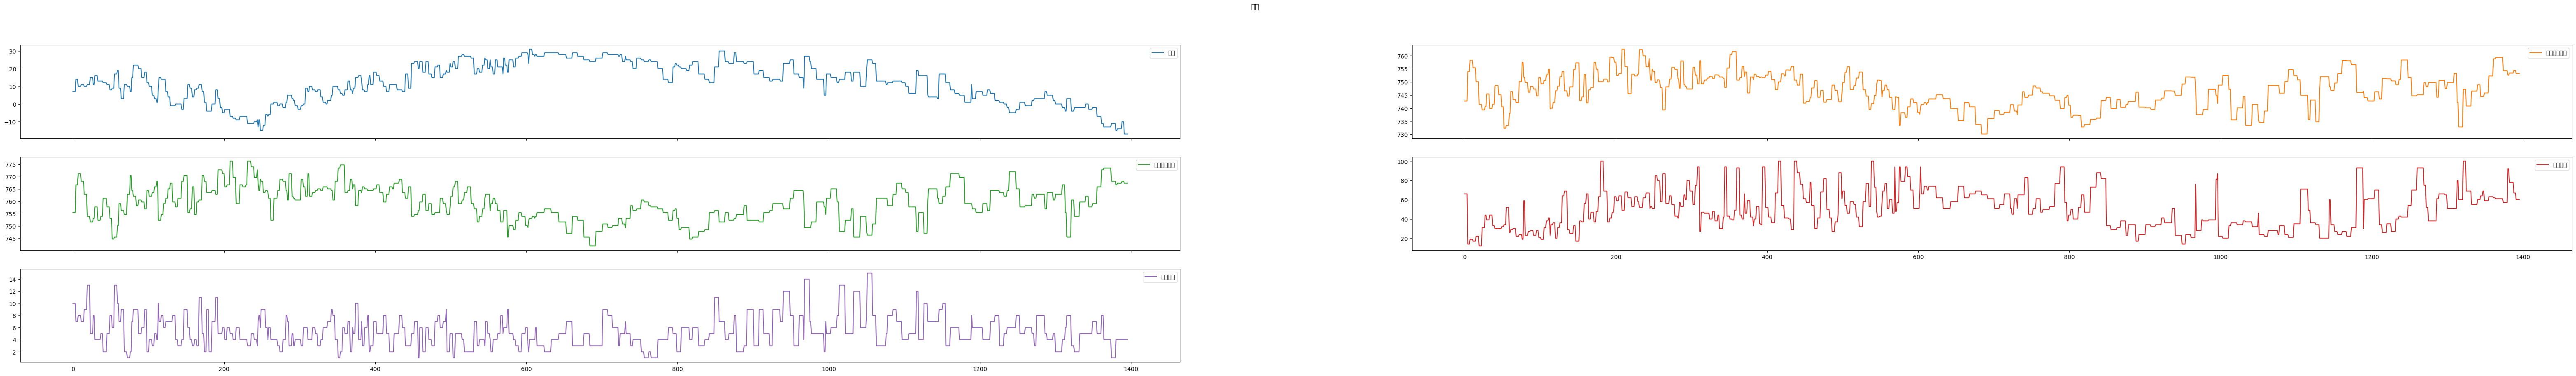

In [45]:
common.plot(subplots=True, figsize= (80, 10), 
         layout = (3, 2), title='天气')

In [47]:
from sklearn.preprocessing import MinMaxScaler

# 最小-最大归一化
min_max_scaler = MinMaxScaler()
common_normalized = min_max_scaler.fit_transform(common)
common_normalized

array([[0.5       , 0.38888889, 0.39358601, 0.61363636, 0.64285714],
       [0.5       , 0.38888889, 0.39358601, 0.61363636, 0.64285714],
       [0.5       , 0.38888889, 0.39358601, 0.61363636, 0.64285714],
       ...,
       [0.        , 0.71296296, 0.74052478, 0.54545455, 0.21428571],
       [0.        , 0.71296296, 0.74052478, 0.54545455, 0.21428571],
       [0.        , 0.71296296, 0.74052478, 0.54545455, 0.21428571]])

array([[<AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >]], dtype=object)

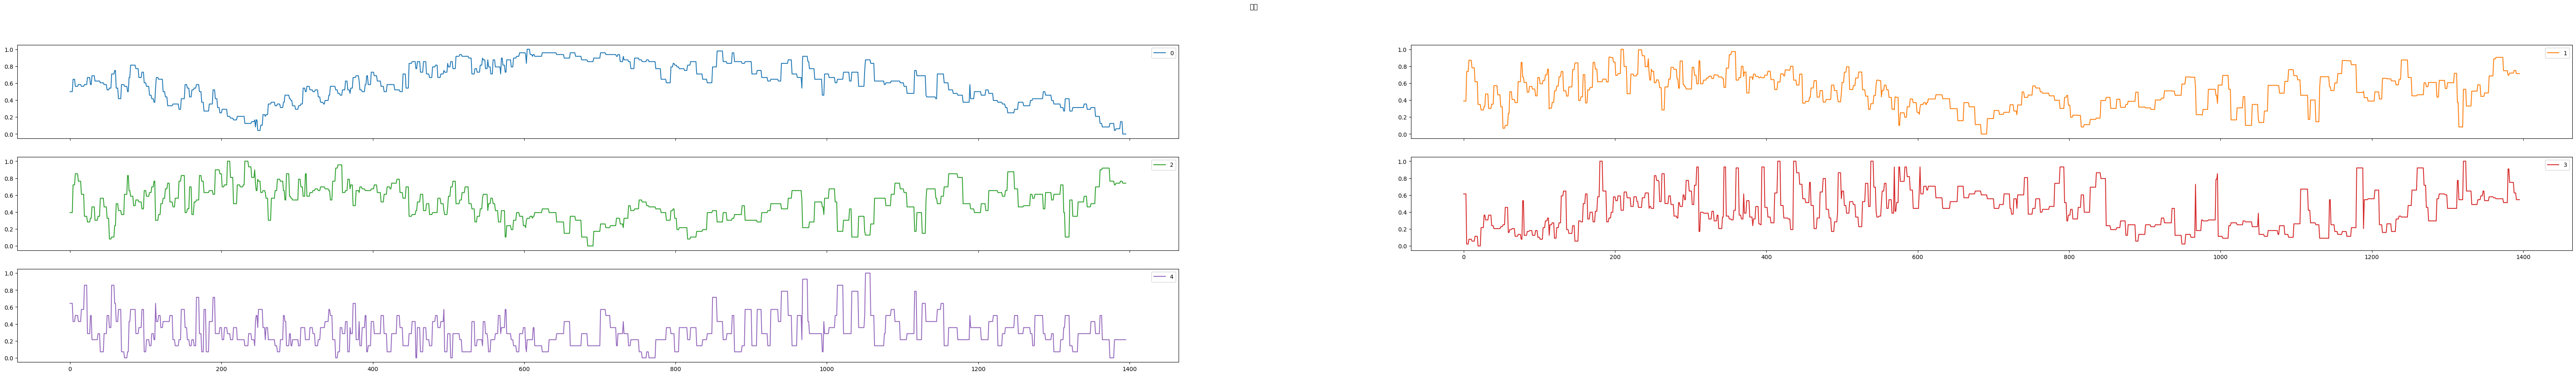

In [52]:
pd.DataFrame(common_normalized).plot(subplots=True, figsize= (80, 10), 
         layout = (3, 2), title='天气')

In [55]:
test = pd.concat([pd.Series(timestamp), period, week, is_workday, pd.DataFrame(common_normalized), weather], axis=1)
test

,timestamp,时段_0,时段_1,时段_2,时段_3,时段_4,星期_1,星期_2,星期_3,星期_4,...,星期_7,是否为工作日_0,是否为工作日_1,0,1,2,3,4,天气好/坏_0,天气好/坏_1
0,1.682417e+09,0,0,0,1,0,0,1,0,0,...,0,0,1,0.500000,0.388889,0.393586,0.613636,0.642857,1,0
1,1.682415e+09,0,0,0,1,0,0,1,0,0,...,0,0,1,0.500000,0.388889,0.393586,0.613636,0.642857,1,0
2,1.682394e+09,0,1,0,0,0,0,1,0,0,...,0,0,1,0.500000,0.388889,0.393586,0.613636,0.642857,1,0
3,1.682380e+09,1,0,0,0,0,0,1,0,0,...,0,0,1,0.500000,0.388889,0.393586,0.613636,0.642857,1,0
4,1.682330e+09,0,0,0,1,0,1,0,0,0,...,0,0,1,0.645833,0.737654,0.720117,0.022727,0.428571,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,1.641007e+09,0,1,0,0,0,0,0,0,0,...,0,1,0,0.000000,0.712963,0.740525,0.545455,0.214286,1,0
1392,1.640974e+09,0,0,0,0,1,0,0,0,0,...,0,1,0,0.000000,0.712963,0.740525,0.545455,0.214286,1,0
1393,1.640974e+09,0,0,0,0,1,0,0,0,0,...,0,1,0,0.000000,0.712963,0.740525,0.545455,0.214286,1,0
1394,1.640974e+09,0,0,0,0,1,0,0,0,0,...,0,1,0,0.000000,0.712963,0.740525,0.545455,0.214286,1,0


In [61]:
y = df['交易额']
y = pd.DataFrame(y)
y_normal = min_max_scaler.fit_transform(y)
y_normal = pd.DataFrame(y_normal)

In [62]:
test.to_csv('D:/Innovation/DataSet/test.csv', encoding='gbk', index=False)
y_normal.to_csv('D:/Innovation/DataSet/amount.csv', encoding='gbk', index=False)
address.to_csv('D:/Innovation/DataSet/address.csv', encoding='gbk', index=False)